# Usman Khalid

## Machine Learning
#### The Sparks Foundation Internship

Predict the percentage of a student based on the no. of study hours.


### importing neccessary libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

### defining the function for linear regression and cost function

In [2]:
def regression(intercept, slope, features):
    """
    Performs a simple linear regression algorithm
    :param intercept: x-intercept of the function
    :param slope: weights of the features
    :param features: function features
    :return: Predicted answer
    """
    prediction = intercept + slope*features
    return prediction

In [3]:
def cost_function(intercept, slope, features, target):
    """
    Calculates the cost function of the algorithm
    :return:
    """
    answer = regression(intercept, slope, features)
    loss = keras.losses.mse(target, answer)
    return loss

### Loading data from CSV file 

In [4]:
student_data = pd.read_csv(r"D:\Usman\Data Science\The Sparks Foundation\Task 1\student_scores.csv")
#converting data into a numpy array
hours = np.asarray(student_data['Hours'])
scores = np.asarray(student_data['Scores'])
#displaying the data to see the dataframe structure
print(student_data.head())
print(student_data.tail())
student_data.describe()

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
    Hours  Scores
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### initializing parameters and training the model

In [5]:
#setting up hyper parameters
learning_rate = 0.05
training_epochs = 1000

In [6]:
#initializing the function weights and bias as a tensorflow random variable
rng = np.random
theta0 = tf.Variable(rng.randn(), name="Bias")
theta = tf.Variable(rng.randn(), name="Weights")

In [7]:
#setting up the optimizer and training regression model
opt = tf.keras.optimizers.Adam(learning_rate)
for j in range(training_epochs):
    opt.minimize(lambda: cost_function(theta0, theta, hours, scores),
                 var_list=[theta0, theta])

In [8]:
#taking input from the user for predictive analysis
enter_hours = float(input("Enter number of hours studied "
                          "to predict the student score: "))
score = theta0 + (theta * enter_hours)
print("The student is predicted to score {0} by studying {1} "
      "hours".format(score, enter_hours))

Enter number of hours studied to predict the student score: 9.25
The student is predicted to score 90.39282989501953 by studying 9.25 hours


### plotting 

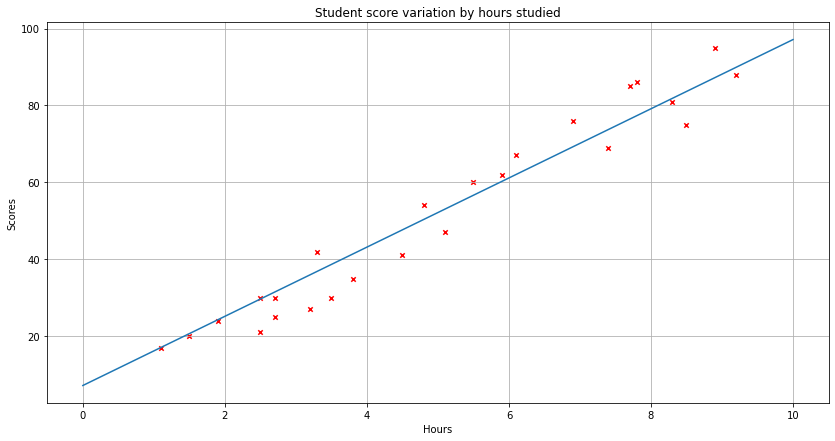

In [9]:
#plotting data and the learned model function
student_data.plot(kind='scatter', x='Hours', y='Scores',
                  figsize=(14, 7), marker='x', color='r',
                  title='Student score variation by hours studied',
                  )
x = np.linspace(0,10,num=20)
y = theta0 + (theta * x)
plt.grid()
plt.plot(x,y)
plt.show()